In [3]:
# Step 1: Install kaggle (if not already installed)
!pip install -q kaggle

import os
import zipfile

# Step 2: Set Kaggle API credentials
# Place your kaggle.json file inside /content or your chosen directory
os.environ['KAGGLE_CONFIG_DIR'] = "/Users/chethas/kaggle/"  # update if you store kaggle.json elsewhere

# Step 3: Define download & extract function
def download_kaggle_dataset(dataset_slug, output_folder):
    zip_filename = f"{output_folder}.zip"
    
    # Download dataset
    !kaggle datasets download -d {dataset_slug} -f {zip_filename} --unzip -p {output_folder}

    # Manually unzip if needed
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(output_folder)

# Step 4: Download datasets
!kaggle datasets download -d padmapiyush/global-electric-vehicle-dataset-2023 -p global_ev --unzip
!kaggle datasets download -d deadprstkrish/ev-cars-user-reviews-india -p ev_reviews --unzip


Dataset URL: https://www.kaggle.com/datasets/padmapiyush/global-electric-vehicle-dataset-2023
License(s): MIT
  0%|                                               | 0.00/67.2k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 67.2k/67.2k [00:00<00:00, 77.0MB/s]
Dataset URL: https://www.kaggle.com/datasets/deadprstkrish/ev-cars-user-reviews-india
License(s): CC0-1.0
  0%|                                                | 0.00/179k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 179k/179k [00:00<00:00, 326MB/s]


In [4]:
import pandas as pd

# Load review datasets
df_carwale = pd.read_csv("ev_reviews/4-wheeler-EV-carwale.csv")
df_cardekho = pd.read_csv("ev_reviews/4-wheeler-EV-cardekho.csv")

# Normalize columns
df_carwale = df_carwale.rename(columns={"review": "Review", "model_name": "Model"})
df_cardekho = df_cardekho.rename(columns={"Review": "Review", "Model": "Model"})

# Combine reviews
df_reviews = pd.concat([df_carwale[['Review', 'Model']], df_cardekho[['Review', 'Model']]], ignore_index=True)
df_reviews.dropna(inplace=True)


In [10]:
df_reviews.head()

,Review,Model
0,Superb car like as fantastic as petroleum car....,hyundai kona
1,"Anti national, worst service, worst customer c...",hyundai kona
2,Super happy with it. The car is too good,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",hyundai kona
4,Price difference between petrol and electronic...,hyundai kona


In [8]:
# Load global EV dataset
df_market = pd.read_csv("global_ev/Global EV 2023.csv")
df_market.head()



,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [9]:
# Load manually downloaded IEA CSV
df_iea = pd.read_csv("iea_ev_data.csv")
df_iea.head()


,region,category,parameter,mode,powertrain,year,unit,value
0,Africa,Historical,EV sales,Cars,BEV,2013,Vehicles,34.00000
1,Africa,Historical,EV stock,Cars,BEV,2013,Vehicles,34.00000
2,Africa,Historical,EV sales share,Cars,EV,2013,percent,0.00190
3,Africa,Historical,EV stock share,Cars,EV,2013,percent,0.00014
4,Africa,Historical,EV stock share,Cars,EV,2014,percent,0.00019


🔎 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  269 non-null    object
 1   Model   269 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB

🧼 Missing values:
Review    0
Model     0
dtype: int64

📝 Review Length Stats:
count     269.000000
mean      254.293680
std       179.011921
min        40.000000
25%       146.000000
50%       200.000000
75%       343.000000
max      1861.000000
Name: Review Length, dtype: float64

🚗 Reviews per EV model:
Model
tata nexon ev    75
Tata Nexon EV    74
hyundai kona     56
tata tigor ev    20
Tata Tigor EV    15
Kia EV6          12
MG ZS EV         12
BYD E6            5
Name: count, dtype: int64


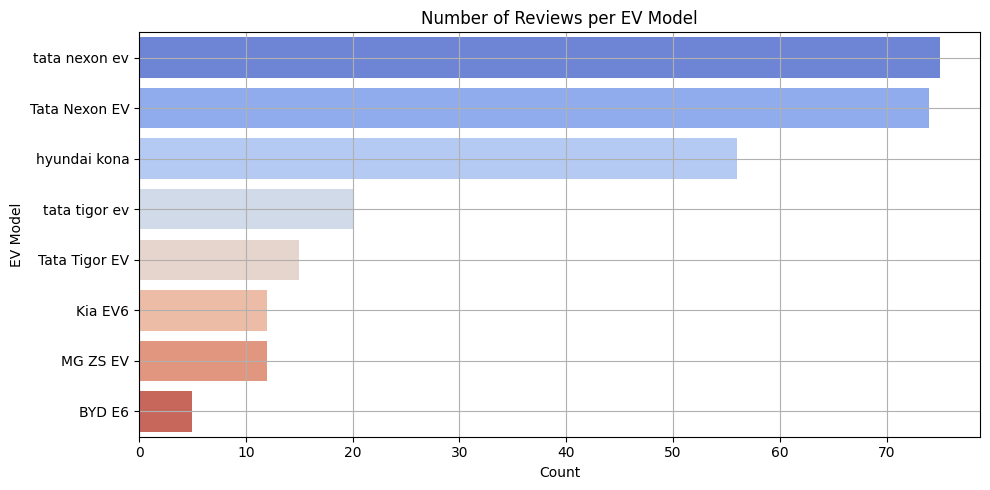

In [11]:
# Basic info
print("🔎 Dataset Summary:")
df_reviews.info()

# Null check
print("\n🧼 Missing values:")
print(df_reviews.isnull().sum())

# Review length analysis
df_reviews['Review Length'] = df_reviews['Review'].str.len()
print("\n📝 Review Length Stats:")
print(df_reviews['Review Length'].describe())

# Reviews per model
print("\n🚗 Reviews per EV model:")
print(df_reviews['Model'].value_counts())

# Visual: Number of reviews per model
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(y='Model', data=df_reviews, order=df_reviews['Model'].value_counts().index, palette="coolwarm")
plt.title("Number of Reviews per EV Model")
plt.xlabel("Count")
plt.ylabel("EV Model")
plt.grid(True)
plt.tight_layout()
plt.show()



🌎 Regions in dataset: 38
🔋 Powertrain types: ['BEV' 'EV' 'PHEV' 'Publicly available fast' 'Publicly available slow']

📆 Data range: 2010 to 2030


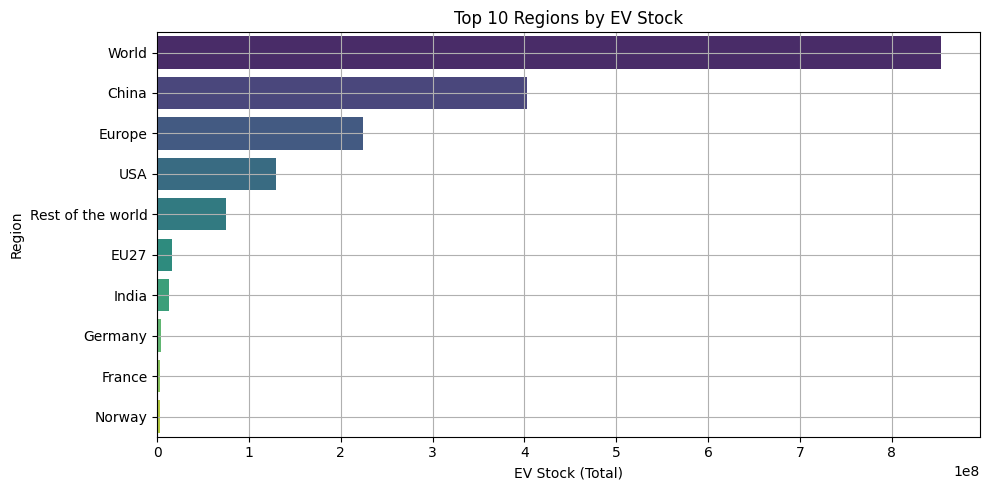

In [12]:
# Unique regions and powertrains
print("\n🌎 Regions in dataset:", df_market['region'].nunique())
print("🔋 Powertrain types:", df_market['powertrain'].unique())

# Most recent year
print("\n📆 Data range:", df_market['year'].min(), "to", df_market['year'].max())

# Average EV stock per region
stock = df_market[(df_market['parameter'] == 'EV stock') & (df_market['unit'] == 'Vehicles')]
top_regions = stock.groupby('region')['value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
plt.title("Top 10 Regions by EV Stock")
plt.xlabel("EV Stock (Total)")
plt.ylabel("Region")
plt.grid(True)
plt.tight_layout()
plt.show()



📊 IEA dataset coverage:
Regions: 61
Parameters: ['EV sales' 'EV stock' 'EV sales share' 'EV stock share'
 'Oil displacement Mbd' 'Oil displacement, million lge' 'Battery demand']
Years: 2010 - 2024


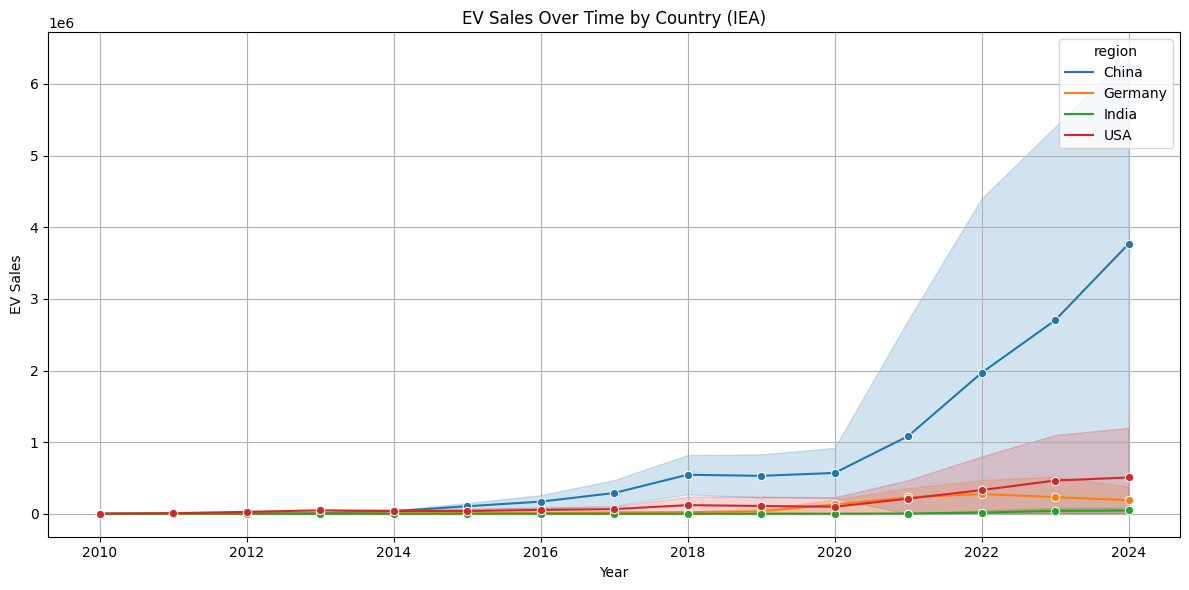

In [14]:
# Count unique values
print("\n📊 IEA dataset coverage:")
print("Regions:", df_iea['region'].nunique())
print("Parameters:", df_iea['parameter'].unique())
print("Years:", df_iea['year'].min(), "-", df_iea['year'].max())

# Visualize EV sales by year for selected regions
selected_countries = ['USA', 'China', 'India', 'Germany']
iea_ev_sales = df_iea[(df_iea['parameter'] == 'EV sales') & (df_iea['region'].isin(selected_countries))]

plt.figure(figsize=(12, 6))
sns.lineplot(data=iea_ev_sales, x='year', y='value', hue='region', marker='o')
plt.title("EV Sales Over Time by Country (IEA)")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
